Loading the libraries

In [1]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
#Loading the dataset
data = pd.read_csv("/Users/ashutoshshanker/Desktop/Data_Git/Company_Dataset/50_Startups.csv")

In [3]:
# Renaming the columns
data = data.rename(columns={'R&D Spend':'R&D_Spend','Administration':'Administration','Marketing Spend':'Marketing_Spend','State':'State', 'Profit':'Profit' })

In [4]:
# First 5 rows in the dataset
data.head(5)

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Statistical Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D_Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing_Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
data.Profit.unique

<bound method Series.unique of 0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64>

In [7]:
data.Profit.median()

107978.19

In [8]:
data.count

<bound method DataFrame.count of     R&D_Spend  Administration  Marketing_Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florid

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D_Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing_Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


Columns with number and percentage of missing data

In [10]:
# Columns with number and percentage of missing data
missing_data = pd.DataFrame([data.isnull().sum(), data.isnull().sum() * 100.0/data.shape[0]]).T
missing_data.columns = ['No. of Missing Data', 'Percentage of Missing data']
missing_data

,No. of Missing Data,Percentage of Missing data
R&D_Spend,0.0,0.0
Administration,0.0,0.0
Marketing_Spend,0.0,0.0
State,0.0,0.0
Profit,0.0,0.0


# Data Correlation

In [11]:
data.corr()

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [12]:
data.cov()

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing_Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


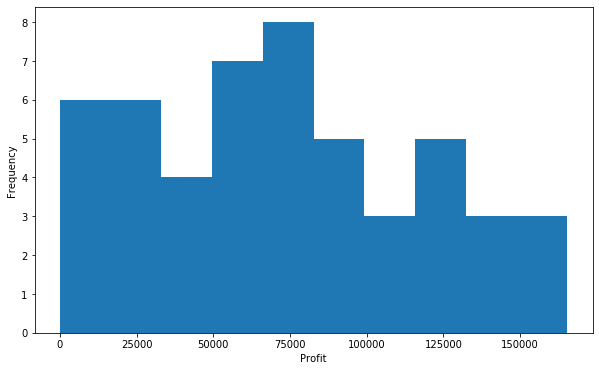

In [13]:
plt.figure(figsize=(10,6))
data['R&D_Spend'].plot(kind='hist')
plt.xlabel("Profit")
plt.ioff()
plt.show()

Correlation Matrix

Text(0.5, 1, 'Correlation Matrix')

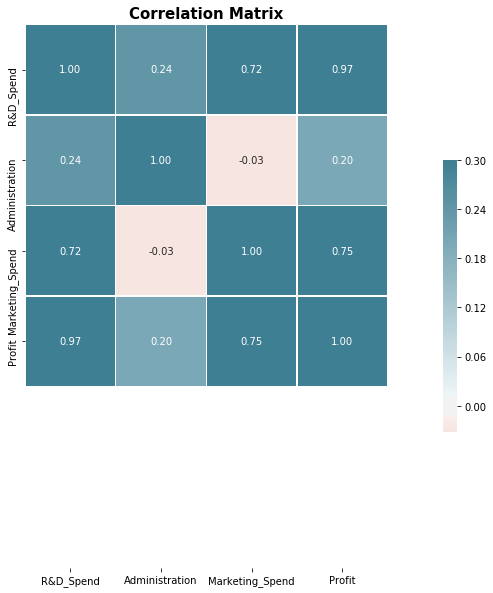

In [14]:
plt.figure(figsize=(20,10))
palette = sns.diverging_palette(20, 220, n=256)
corr=data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(6, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

Text(0.5, 1.0, 'State vs Profit')

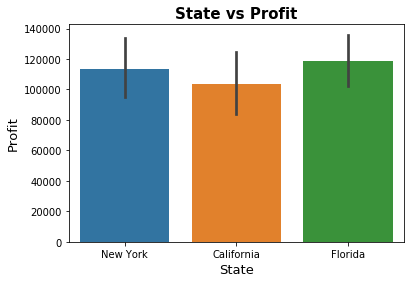

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x='State', y='Profit', data=data)

plt.xlabel("State", size=13)
plt.ylabel("Profit", size=13)
plt.title("State vs Profit",size=15, weight='bold')

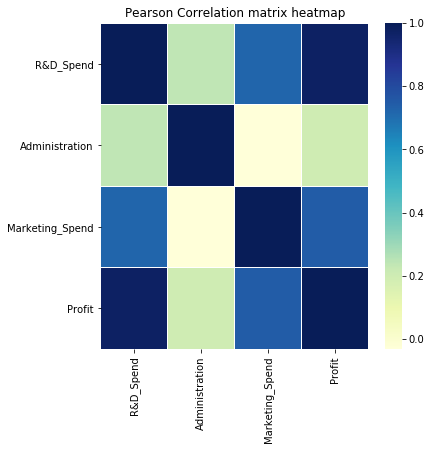

In [16]:
# Correlation matrix heatmap

import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6));
sns.heatmap(data.corr(), ax=ax, annot=False, linewidths=.1, cmap = "YlGnBu");
plt.title('Pearson Correlation matrix heatmap');

Boxplot

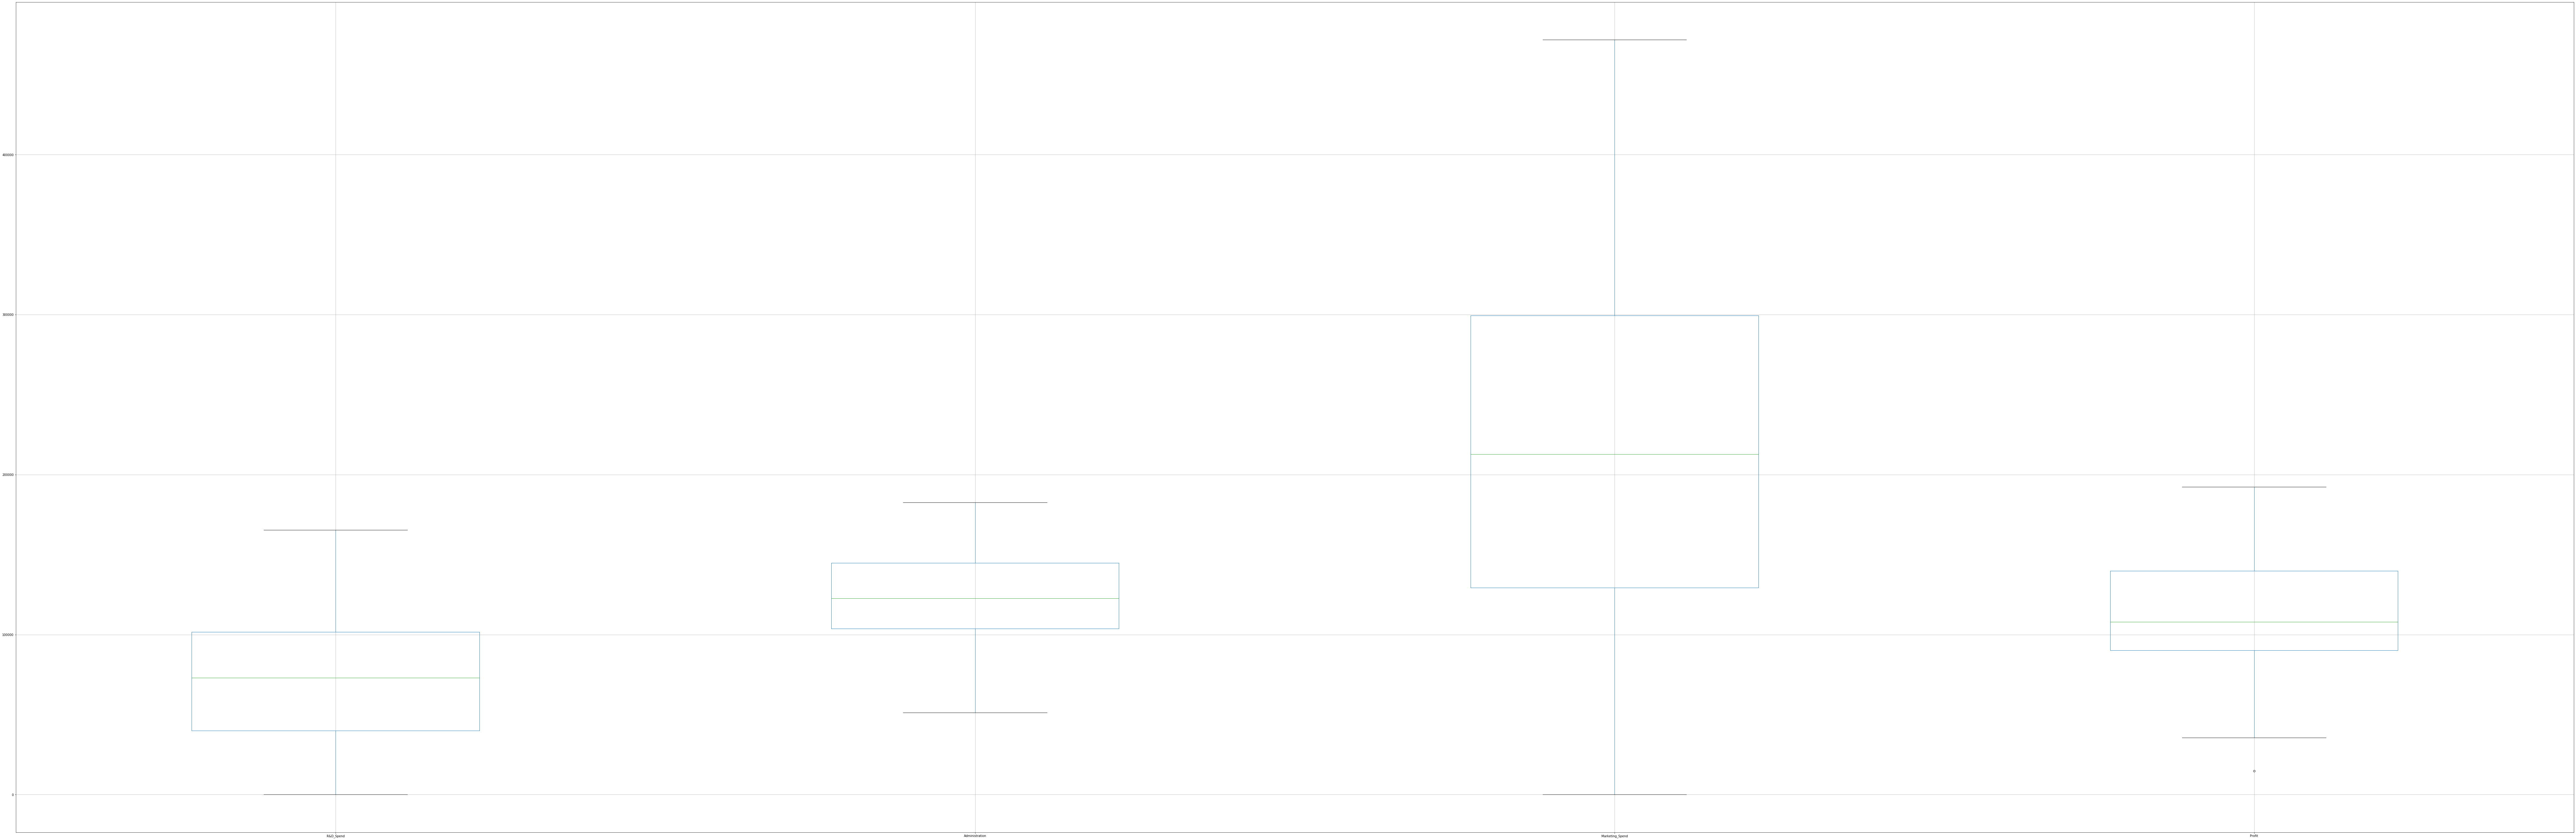

In [17]:
# Boxplot for each attribute
%matplotlib inline
data.boxplot(figsize=(150,50))

In [18]:
data.Marketing_Spend.unique

<bound method Series.unique of 0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19         0.00
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47         0.00
48         0.00
49     45173.06
Name: Marketing_Spend, dtype: float64>

In [19]:
data

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Pearson's Correlation

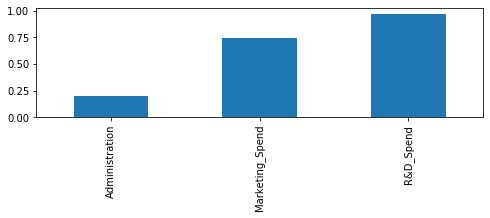

In [20]:
plt.figure(figsize=(8,2))
data.corr()['Profit'].sort_values()[:-1].plot(kind='bar')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a248ae850>,
      dtype=object)

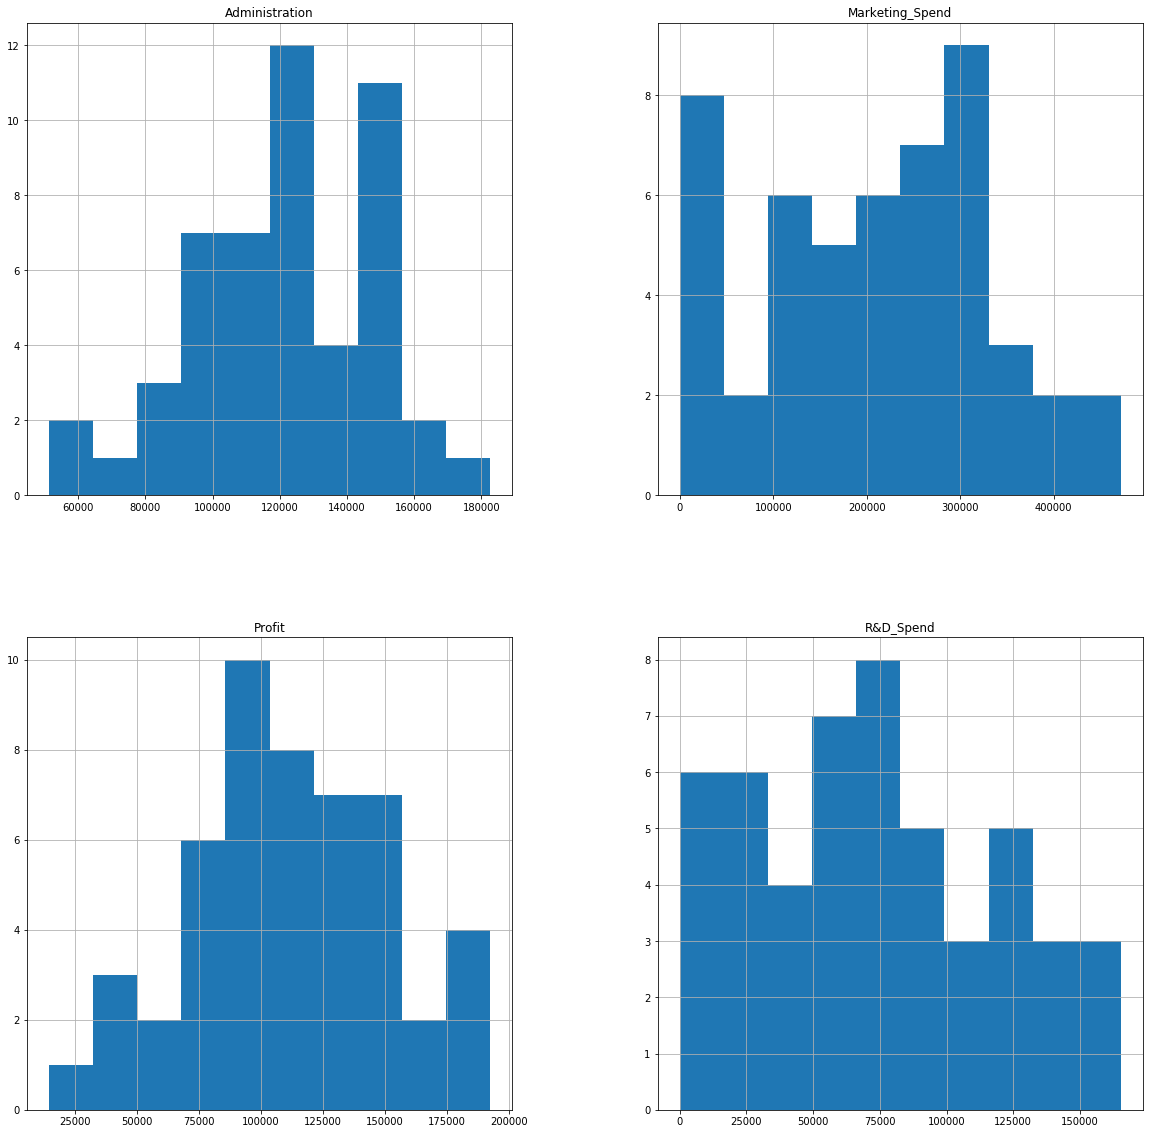

In [21]:
data.hist(figsize=(20,20))

In [22]:
data_box=data.drop('Profit',axis=1)

In [24]:
# Binning 'R&D_Spend' column
bins_RD_Spend = [0.00, 40000, 80000, 120000, 160000, np.inf]
labels_RD_Spend = [40000, 80000, 120000, 160000, 200000]
data['binned_R&D_Spend'] = pd.cut(data['R&D_Spend'], bins_RD_Spend, labels=labels_RD_Spend)

In [25]:
data['binned_R&D_Spend'] = data['binned_R&D_Spend'].replace(np.nan, 0)

In [26]:
# Binning 'Administration' column
bins_Administration = [0.00, 40000, 80000, 120000, 160000, np.inf]
labels_Administration = [40000, 80000, 120000, 160000, 200000]
data['binned_administration'] = pd.cut(data['Administration'], bins_Administration, labels=labels_Administration)

In [27]:
# Binned 'Marketing_Spend' column
bin_Marketing_Spend = [0, 100000, 200000, 300000, 400000, np.inf]
labels_Marketing_Spend = [100000, 200000, 300000, 400000, 500000]
data['binned_marketing_spend'] = pd.cut(data['Marketing_Spend'], bin_Marketing_Spend, labels = labels_Marketing_Spend)

In [28]:
data['binned_marketing_spend'] = data['binned_marketing_spend'].replace(np.nan, 0)

In [29]:
# Binned 'Profit' column
bins_profit = [0.00, 108000, np.inf]
label_profit = ['<108000','>=108000']
data['binned_profit'] = pd.cut(data['Profit'],bins_profit, labels = label_profit)

In [30]:
data

,R&D_Spend,Administration,Marketing_Spend,State,Profit,binned_R&D_Spend,binned_administration,binned_marketing_spend,binned_profit
0,165349.20,136897.80,471784.10,New York,192261.83,200000.0,160000,500000.0,>=108000
1,162597.70,151377.59,443898.53,California,191792.06,200000.0,160000,500000.0,>=108000
2,153441.51,101145.55,407934.54,Florida,191050.39,160000.0,120000,500000.0,>=108000
3,144372.41,118671.85,383199.62,New York,182901.99,160000.0,120000,400000.0,>=108000
4,142107.34,91391.77,366168.42,Florida,166187.94,160000.0,120000,400000.0,>=108000
5,131876.90,99814.71,362861.36,New York,156991.12,160000.0,120000,400000.0,>=108000
6,134615.46,147198.87,127716.82,California,156122.51,160000.0,160000,200000.0,>=108000
7,130298.13,145530.06,323876.68,Florida,155752.60,160000.0,160000,400000.0,>=108000
8,120542.52,148718.95,311613.29,New York,152211.77,160000.0,160000,400000.0,>=108000
9,123334.88,108679.17,304981.62,California,149759.96,160000.0,120000,400000.0,>=108000


In [31]:
data_processed = data
data_processed = data_processed.drop('Profit', axis = 1)
data_processed = data_processed.drop('R&D_Spend', axis = 1)
data_processed = data_processed.drop('Administration', axis = 1)
data_processed = data_processed.drop('Marketing_Spend', axis = 1)

In [32]:
data_processed['binned_profit'] = data_processed['binned_profit'].replace('>=108000', 'More')
data_processed['binned_profit'] = data_processed['binned_profit'].replace('<108000', 'Less')

In [33]:
data_processed

,State,binned_R&D_Spend,binned_administration,binned_marketing_spend,binned_profit
0,New York,200000.0,160000,500000.0,More
1,California,200000.0,160000,500000.0,More
2,Florida,160000.0,120000,500000.0,More
3,New York,160000.0,120000,400000.0,More
4,Florida,160000.0,120000,400000.0,More
5,New York,160000.0,120000,400000.0,More
6,California,160000.0,160000,200000.0,More
7,Florida,160000.0,160000,400000.0,More
8,New York,160000.0,160000,400000.0,More
9,California,160000.0,120000,400000.0,More


In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [35]:
le.fit(data_processed['State'])
data_processed['State_val'] = le.transform(data_processed['State'])


In [36]:
data_processed = data_processed.drop('State', axis = 1)

In [37]:
data_processed

,binned_R&D_Spend,binned_administration,binned_marketing_spend,binned_profit,State_val
0,200000.0,160000,500000.0,More,2
1,200000.0,160000,500000.0,More,0
2,160000.0,120000,500000.0,More,1
3,160000.0,120000,400000.0,More,2
4,160000.0,120000,400000.0,More,1
5,160000.0,120000,400000.0,More,2
6,160000.0,160000,200000.0,More,0
7,160000.0,160000,400000.0,More,1
8,160000.0,160000,400000.0,More,2
9,160000.0,120000,400000.0,More,0


# Data Prediction

In [38]:
# Dividing the dataset into training and testing data:
X = data_processed.drop('binned_profit', axis = 1)
Y = data_processed.binned_profit


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Weight of transaction
#wp = y_train.value_counts()[0] / len(y_train)
#wn = y_train.value_counts()[1] / len(y_train)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {X_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (35, 4)
X_test: (15, 4)
y_train: (35, 4)
y_test: (15,)


In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ashutoshshanker/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [41]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5 4]
 [0 6]]


In [42]:
# Calculating the precision, recall, f1-score, and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Less       1.00      0.56      0.71         9
        More       0.60      1.00      0.75         6

    accuracy                           0.73        15
   macro avg       0.80      0.78      0.73        15
weighted avg       0.84      0.73      0.73        15



In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [44]:
# Decision tree model on original dataset
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
y_pred_dt = classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

# Calculating the precision, recall, f1-score, and support
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[4 5]
 [0 6]]
              precision    recall  f1-score   support

        Less       1.00      0.44      0.62         9
        More       0.55      1.00      0.71         6

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()

In [48]:
# Naive Bayes on original Data
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred_NB = model.predict(X_test)
y_pred_NB

array(['Less', 'More', 'More', 'Less', 'More', 'More', 'Less', 'Less',
       'More', 'More', 'More', 'More', 'Less', 'More', 'More'],
      dtype='<U4')

In [50]:
accuracy = accuracy_score(y_test,y_pred_NB)*100
accuracy

73.33333333333333

In [51]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [52]:
# SVM on dataset
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [54]:
# Neural Network on original dataset
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
y_pred_NN = clf.predict(X_test)

In [56]:
# Accuracy
Accuracy_NN = metrics.accuracy_score(y_test, y_pred_NN)
Accuracy_NN

0.4

In [57]:
data_feature = data_processed

In [58]:
#data_feature = data_feature.drop('binned_administration', axis = 1)
data_feature = data_feature.drop('State_val', axis = 1)

In [59]:
data_feature

,binned_R&D_Spend,binned_administration,binned_marketing_spend,binned_profit
0,200000.0,160000,500000.0,More
1,200000.0,160000,500000.0,More
2,160000.0,120000,500000.0,More
3,160000.0,120000,400000.0,More
4,160000.0,120000,400000.0,More
5,160000.0,120000,400000.0,More
6,160000.0,160000,200000.0,More
7,160000.0,160000,400000.0,More
8,160000.0,160000,400000.0,More
9,160000.0,120000,400000.0,More
